In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [21]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [3]:
# - x='product',y='amount' 
# - order by : top 3(amount)
# - hue='type_of_contract2'
df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

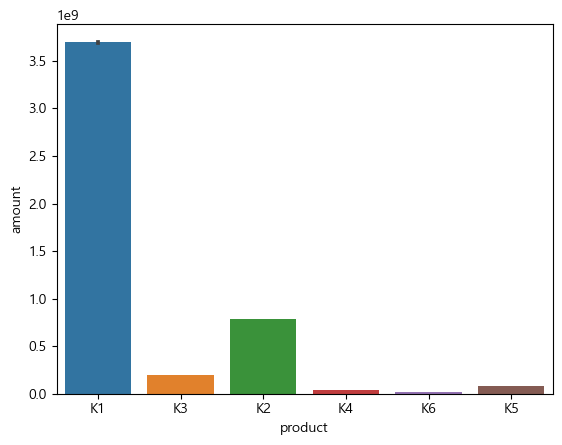

In [24]:
sns.barplot(data=df_TOCC, x='product', y='amount', estimator=sum) #기본 총합 estimator=sum
plt.show()

In [25]:
df_TOCC_product = pd.pivot_table(data=df_TOCC, index='product', values='amount', aggfunc=sum)
df_TOCC_product


,amount
product,
K1,3695172705
K2,787567890
K3,197181960
K4,42328500
K5,77236500
K6,22734000


### Top3 뽑기

In [27]:
df_TOCC_top_list = df_TOCC_product.sort_values(by = 'amount', ascending=False).iloc[:3].index.to_list() # 클래스라 바로 사용 모담 그래서 to_list() 써줌
# 그다음 order 대입
df_TOCC_top_list

['K1', 'K2', 'K3']

<Axes: xlabel='product', ylabel='amount'>

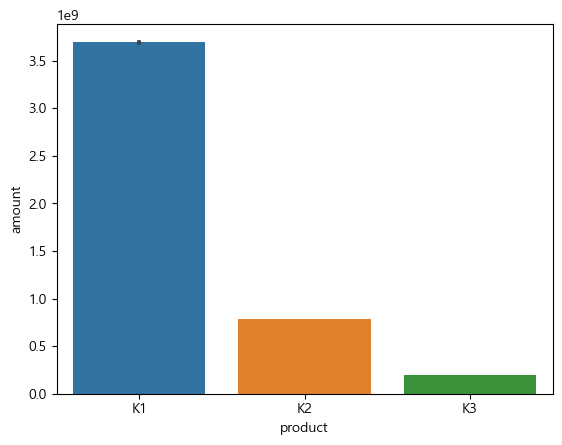

In [28]:
sns.barplot(data=df_TOCC, x='product',y='amount', estimator=sum,  order=df_TOCC_top_list) # 실수 많이 estimator=sum,  order=df_TOCC_top_list 함 앞에 맞춰줘야함

<Axes: xlabel='product', ylabel='amount'>

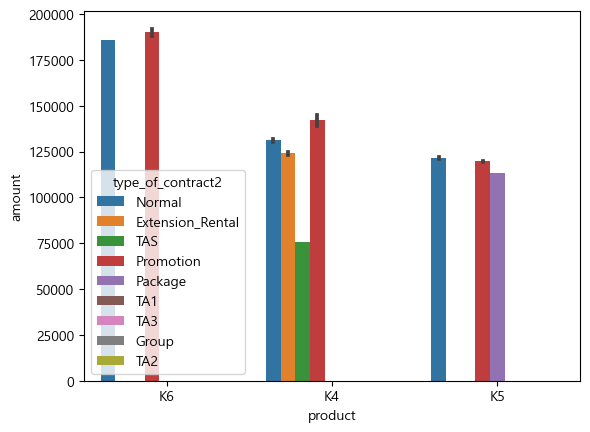

In [20]:
sns.barplot(data=df_TOCC, x='product', y='amount', order=df_TOCC_top_list, hue='type_of_contract2')